NAME : SOUNDARIYAN MN

REG: 212222230146

In [1]:

import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import utils
import pandas as pd
from sklearn.metrics import classification_report,confusion_matrix
from tensorflow.keras.preprocessing import image

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [3]:
X_train.shape


(60000, 28, 28)

In [4]:

X_test.shape


(10000, 28, 28)

In [5]:
single_image= X_train[0]


In [6]:

single_image.shape


(28, 28)

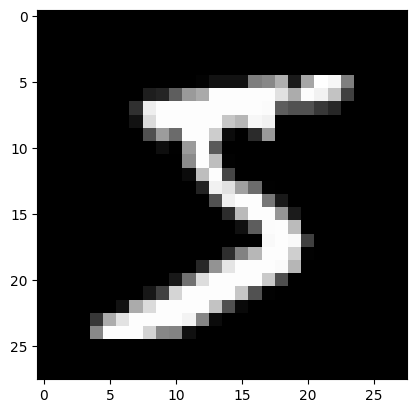

In [7]:

plt.imshow(single_image,cmap='gray')


In [8]:
y_train.shape

(60000,)

In [9]:

X_train.min()


0

In [10]:

X_train.max()

255

In [11]:
X_train_scaled = X_train/255.0
X_test_scaled = X_test/255.0


In [12]:

X_train_scaled.min()


0.0

In [13]:
X_train_scaled.max()


1.0

In [14]:
y_train[0]


5

In [15]:
y_train_onehot = utils.to_categorical(y_train,10)
y_test_onehot = utils.to_categorical(y_test,10)


In [16]:

type(y_train_onehot)

numpy.ndarray

In [17]:


y_train_onehot.shape

(60000, 10)

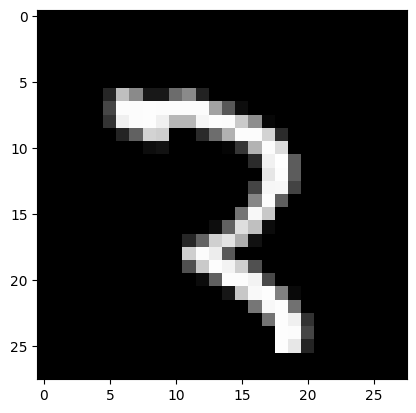

In [18]:

single_image = X_train[500]
plt.imshow(single_image,cmap='gray')

In [19]:
y_train_onehot[500]

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.])

In [20]:
X_train_scaled = X_train_scaled.reshape(-1,28,28,1)
X_test_scaled = X_test_scaled.reshape(-1,28,28,1)


In [24]:
model = keras.Sequential()
model.add(layers.Input(shape=(28,28,1)))
model.add(layers.Conv2D(filters=32,kernel_size=(3,3),activation='relu'))
model.add(layers.MaxPool2D(pool_size=(2,2)))
model.add(layers.Flatten())
model.add(layers.Dense(32,activation='relu'))
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dense(10,activation='softmax'))

In [25]:
model.summary()
print('''soundariyan
212222230146''')

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 5408)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 32)                  │         173,088 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           2,112 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 176,170 (688.16 KB)

 Trainable params: 176,170 (688.16 KB)

 Non-trainable params: 0 (0.00 B)

soundariyan
212222230146


In [26]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [27]:
model.fit(X_train_scaled ,y_train_onehot, epochs=5,batch_size=64,validation_data=(X_test_scaled,y_test_onehot))

Epoch 1/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 38s 39ms/step - accuracy: 0.8523 - loss: 0.5110 - val_accuracy: 0.9699 - val_loss: 0.0986
Epoch 2/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 32s 29ms/step - accuracy: 0.9723 - loss: 0.0932 - val_accuracy: 0.9734 - val_loss: 0.0850
Epoch 3/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 42s 30ms/step - accuracy: 0.9808 - loss: 0.0606 - val_accuracy: 0.9819 - val_loss: 0.0523
Epoch 4/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 37s 40ms/step - accuracy: 0.9856 - loss: 0.0456 - val_accuracy: 0.9828 - val_loss: 0.0514
Epoch 5/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 31s 29ms/step - accuracy: 0.9892 - loss: 0.0363 - val_accuracy: 0.9843 - val_loss: 0.0487


In [28]:
metrics = pd.DataFrame(model.history.history)


In [30]:
metrics.head()

,accuracy,loss,val_accuracy,val_loss
0,0.924633,0.256578,0.9699,0.098589
1,0.973800,0.086040,0.9734,0.084999
2,0.981233,0.060587,0.9819,0.052322
3,0.985800,0.045086,0.9828,0.051429
4,0.988767,0.036967,0.9843,0.048675


soundariyan
212222230146


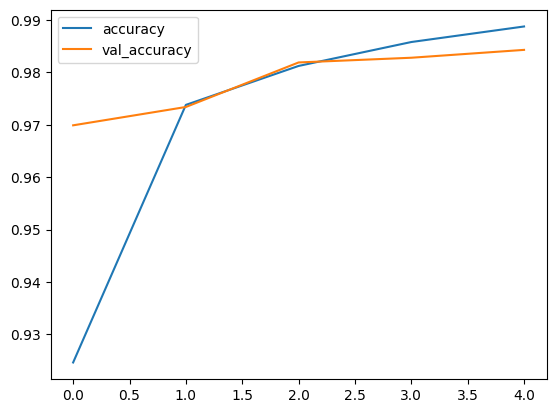

In [31]:
metrics[['accuracy','val_accuracy']].plot()
print('''soundariyan
212222230146''')

soundariyan
212222230146


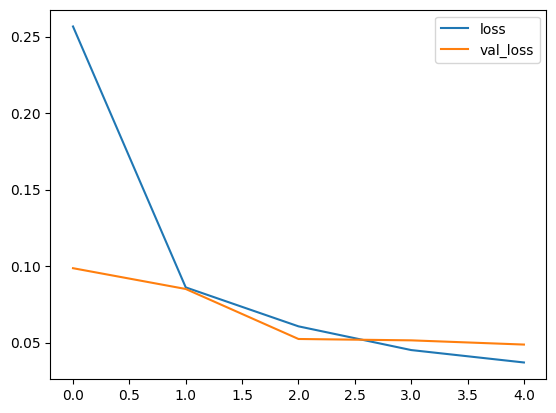

In [32]:
metrics[['loss','val_loss']].plot()
print('''soundariyan
212222230146''')


In [33]:
x_test_predictions = np.argmax(model.predict(X_test_scaled), axis=1)


313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step


In [34]:
print(confusion_matrix(y_test,x_test_predictions))
print('''soundariyan
212222230146''')

[[ 972    0    0    0    0    1    3    2    2    0]
 [   0 1122    3    1    4    0    2    2    1    0]
 [   1    3 1010    0    1    0    1   11    5    0]
 [   0    0    4  995    0    4    0    5    2    0]
 [   0    0    0    0  978    0    0    0    2    2]
 [   0    0    0    6    0  880    3    0    3    0]
 [   3    2    1    0    5    2  943    0    2    0]
 [   1    1    7    1    1    0    0 1012    3    2]
 [   3    0    4    1    2    1    1    3  953    6]
 [   1    0    0    1   15    6    0    5    3  978]]
soundariyan
212222230146


In [35]:
print(classification_report(y_test,x_test_predictions))
print('''soundariyan
212222230146''')

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.98      0.98      1032
           3       0.99      0.99      0.99      1010
           4       0.97      1.00      0.98       982
           5       0.98      0.99      0.99       892
           6       0.99      0.98      0.99       958
           7       0.97      0.98      0.98      1028
           8       0.98      0.98      0.98       974
           9       0.99      0.97      0.98      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000

soundariyan
212222230146


In [36]:
img = image.load_img('digi.jpg')


In [37]:
type(img)


PIL.JpegImagePlugin.JpegImageFile

In [38]:
img = image.load_img('digi.jpg')
img_tensor = tf.convert_to_tensor(np.asarray(img))
img_28 = tf.image.resize(img_tensor,(28,28))
img_28_gray = tf.image.rgb_to_grayscale(img_28)
img_28_gray_scaled = img_28_gray.numpy()/255.0

In [39]:
x_single_prediction = np.argmax(
    model.predict(img_28_gray_scaled.reshape(1,28,28,1)),
     axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


In [40]:
print(x_single_prediction)

[6]


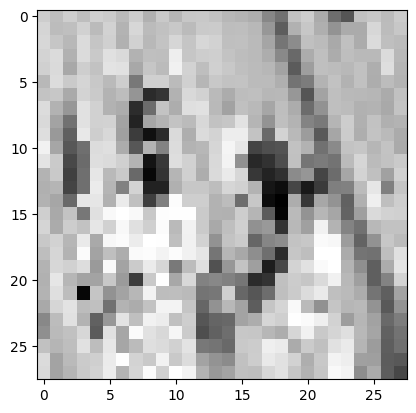

In [41]:

plt.imshow(img_28_gray_scaled.reshape(28,28),cmap='gray')

In [42]:
img_28_gray_inverted = 255.0-img_28_gray
img_28_gray_inverted_scaled = img_28_gray_inverted.numpy()/255.0

In [43]:
x_single_prediction = np.argmax(
    model.predict(img_28_gray_inverted_scaled.reshape(1,28,28,1)),
     axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


In [44]:
print(x_single_prediction)

[7]
